# A brief analysis from the Data Science Portugal Meetup community

Data Science Portugal (DSPT) is an informal community of data science enthusiasts created with the purpose of sharing knowledge and experience in the fields of data science, machine learning and artificial intelligence. 
This is an attempt to explore characteristics about the community and to highlight its interests using publicly available data. 

### Building the dataset

We will start by collecting data from the official profile from Meetup (http://www.meetup.com/datascienceportugal). 
All the information used here is publicly available by any member using the Meetup API (https://www.meetup.com/meetup_api/). 


### Set up
Setting up api keys, Meetup id and importing requirements.

In [3]:
#personal meetup api key
meetup_api_key = "15a6e6f3f178105715f363c515c2a"
group_urlname = "datascienceportugal"


In [7]:
import requests
import json
import time
import codecs
import sys
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
# Will allow us to embed images in the notebook
%matplotlib inline

### Loading group information using Meetup REST API

This method loads information about DSPT's profile. 
We can fetch detailed info such as number of members, description, organizers and next scheduled events.

In [8]:
meetup_api = "https://api.meetup.com/"

def load_group_info(groupname):    
    request = requests.get( meetup_api + groupname, params={"key":meetup_api_key})
    meetup_data = request.json()
    return meetup_data
    
group_info = load_group_info(group_urlname)


print(group_info["name"])
print(group_info["members"])
print(group_info["link"])
print(group_info["next_event"])

print()
print("All information we can collect ...")
print(group_info.keys())


Data Science Portugal (DSPT)
756
https://www.meetup.com/datascienceportugal/
{'id': '244995385', 'name': 'DSPT#18 - The Big Data Championship', 'yes_rsvp_count': 31, 'time': 1511375400000, 'utc_offset': 0}

All information we can collect ...
dict_keys(['id', 'name', 'status', 'link', 'urlname', 'description', 'created', 'city', 'country', 'localized_country_name', 'localized_location', 'state', 'join_mode', 'visibility', 'lat', 'lon', 'members', 'organizer', 'who', 'key_photo', 'timezone', 'next_event', 'category', 'meta_category'])


### Detailed profile description 

In [9]:
display(HTML(group_info["description"]))

### Load members profiles

Now what really matter are is profile information from each DSPT member. 
The following code paginates over the api to collect info from every single member.

In [10]:
def load_more_meetup_data(url):
    request = requests.get(url)
    data = request.json()
    
    members = data["results"]

    if("next" in data["meta"].keys()):
        if(data["meta"]["next"] is not ""):
#             print("fetching ... ",data["meta"]["next"])
            members = members + load_more_meetup_data(data["meta"]["next"])
            
    return members
            

            
def load_members_from_group(group_urlname):
    url = "https://api.meetup.com/2/members"

    request = requests.get(url,params={"offset":0,
                                       "format":"json",
                                       "key":meetup_api_key,
                                       "group_urlname":group_urlname})
    
    data = request.json()
    members = data["results"]
    
    if(data["meta"]["next"] is not ""):
#         print("fetching ... ",data["meta"]["next"])
        members = members + load_more_meetup_data(data["meta"]["next"])
    
    return members
    
print("fetching members...")    
members = load_members_from_group(group_info["urlname"])

print("members fetched ", len(members))



fetching members...
members fetched  756


To make things easier lets convert the data structure into a pandas.DataFrame and see a sample of the dataset.

In [11]:
df = pd.DataFrame(members)
# persist dataset
df.to_csv("members.csv")

df.head() 

,bio,city,country,hometown,id,joined,lang,lat,link,lon,name,other_services,photo,self,state,status,topics,visited
0,NaN,Porto,pt,NaN,89159812,1487062197000,NaN,41.15,http://www.meetup.com/members/89159812,-8.62,Adal,{},{'highres_link': 'https://secure.meetupstatic....,{'common': {}},NaN,active,"[{'urlkey': 'webstandards', 'name': 'Web Stand...",1510353139000
1,NaN,Porto,pt,NaN,227309981,1494436558000,NaN,41.15,http://www.meetup.com/members/227309981,-8.62,Afonso Silva,{},{'highres_link': 'https://secure.meetupstatic....,{'common': {}},NaN,active,"[{'urlkey': 'knowledge-sharing', 'name': 'Know...",1510323708000
2,NaN,Porto,pt,NaN,240136574,1509441928000,NaN,41.15,http://www.meetup.com/members/240136574,-8.62,Ahmed Fares,{},{'highres_link': 'https://secure.meetupstatic....,{'common': {}},NaN,active,[],1509441928000
3,NaN,Khadki,in,NaN,223975793,1509726808000,NaN,18.57,http://www.meetup.com/members/223975793,73.83,Akshay Kant,{},{'highres_link': 'https://secure.meetupstatic....,{'common': {}},NaN,active,"[{'urlkey': 'newtech', 'name': 'New Technology...",1510321853000
4,NaN,Aveiro,pt,Aveiro,220719554,1486507470000,NaN,40.65,http://www.meetup.com/members/220719554,-8.66,Alberto São Marcos,{'twitter': {'identifier': '@albertocsm'}},{'highres_link': 'https://secure.meetupstatic....,{'common': {}},NaN,active,[],1496329142000


### From which town members are from?

Users can provide information about where they live and their hometown. 
Most of the members live in Porto, followed by Lisbon, Aveiro, Braga and Coimbra. 

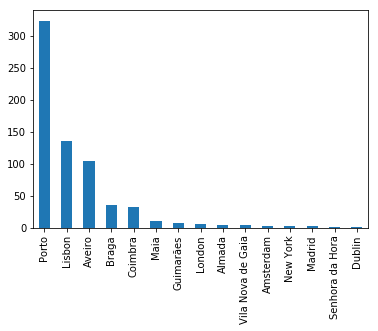

In [12]:
top_cities = df['city'].value_counts()[:15]
top_cities.plot(kind='bar')

Some users provided their hometown as well. 
We can see that we have quite an international community with people from countries like Brazil, UK, Italy, USA and Ireland.

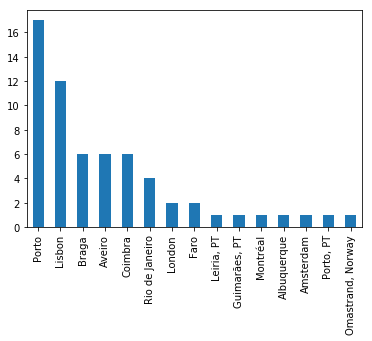

In [13]:
top_cities = df['hometown'].value_counts()[:15]
top_cities.plot(kind='bar')

In [14]:
print(df['country'].value_counts()[:])

pt    700
gb     10
us      8
es      7
br      6
nl      4
se      3
ca      2
ie      2
gr      2
de      2
gp      1
za      1
jp      1
au      1
be      1
mx      1
in      1
ro      1
no      1
ba      1
Name: country, dtype: int64


### Common interests

Users can also provide their interests. 
Here we plot the most frequent. 

In [15]:
all_topics = []

def flat_topics(row):
#     print(row)
    topics = [x["name"] for x in row]
    for topic in topics:
        all_topics.append(topic)

df["flat_topics"] = df["topics"].apply(lambda x: flat_topics(x))

from collections import Counter
Counter(all_topics).most_common(10)



[('New Technology', 252),
 ('Startup Businesses', 142),
 ('Open Source', 137),
 ('Education & Technology', 122),
 ('Software Development', 113),
 ('Data Analytics', 109),
 ('Machine Learning', 109),
 ('Innovation', 108),
 ('Web Technology', 100),
 ('Technology Startups', 98)]

### Plotting common interests as a Wordcloud

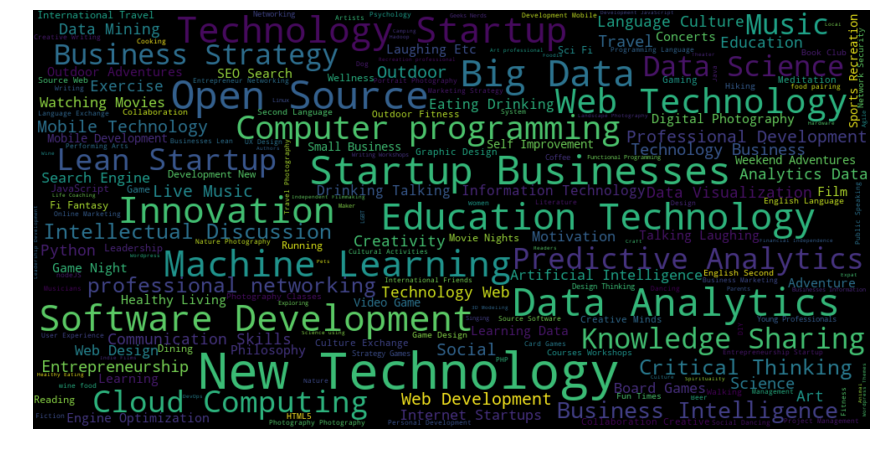

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, max_font_size=60).generate(", ".join(all_topics))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
import geojson

def data2geojson(df):
    features = []
    df.apply(lambda X: features.append( 
            geojson.Feature(geometry=geojson.Point((X["lon"], 
                                                    X["lat"])), 
                properties=dict(name=X["name"])))
            , axis=1)
    
#     , description=unicode(X["city"].decode('utf8'))
    
    with open('map.geojson', 'w') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True)
        
geo_df = df[['name','city','lon','lat']]        

print(geo_df.head())

geojson = data2geojson(geo_df)

                 name    city    lon    lat
0                Adal   Porto  -8.62  41.15
1        Afonso Silva   Porto  -8.62  41.15
2        Ahmed Fares    Porto  -8.62  41.15
3         Akshay Kant  Khadki  73.83  18.57
4  Alberto São Marcos  Aveiro  -8.66  40.65


In [31]:
from __future__ import print_function
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

center = [0, 0]
zoom = 1

m = Map(center=center, zoom=zoom)
m

A Jupyter Widget

In [ ]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.colors
import numpy as np

def n_colors(n, colormap=mpl.cm.Blues):
    data = np.linspace(0.0,1.0,n)
    c = [mpl.colors.rgb2hex(d[0:3]) for d in colormap(data)]
    return c

def data_to_colors(data, colormap=mpl.cm.Blues):
    c = [mpl.colors.rgb2hex(d[0:3]) for d in colormap(mpl.colors.Normalize()(data))]
    return c

import json
with open('map.geojson') as f:
    data = json.load(f)
    
n_features = len(data['features'])
colors = n_colors(n_features)
print(n_features)

for feature, color in zip(data['features'], colors):
    feature['properties']['style'] = {'color':color, 'weight': 1, 'fillColor':color, 'fillOpacity':0.5}

In [ ]:
g = GeoJSON(data=data)
m.add_layer(g)